AF2 A Chain: 2905 atoms
AF3 A Chain: 2905 atoms


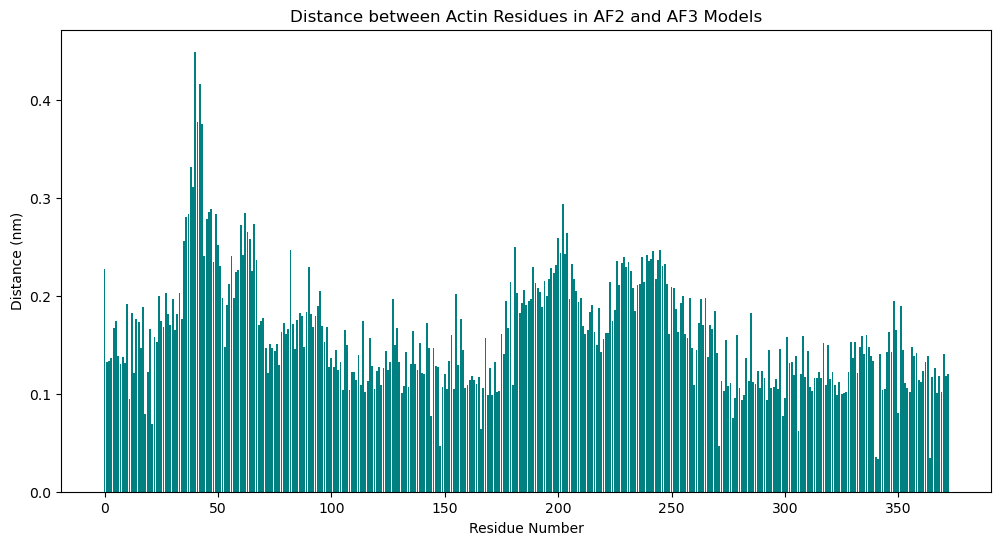

Residues with significant differences (distance > 0.5 nm):


In [4]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# 加载 AF2 和 AF3 模型
af2_model = md.load('Alphafold2.pdb')  # AF2 文件
af3_model = md.load('Alphafold3.pdb')  # AF3 文件

# 选择 AF2 和 AF3 中的 A 链（374 residues）
af2_chain_A_atoms = af2_model.atom_slice(af2_model.topology.select('chainid 0'))
af3_chain_A_atoms = af3_model.atom_slice(af3_model.topology.select('chainid 0'))

# 检查 A 链的原子数量是否一致
print(f"AF2 A Chain: {af2_chain_A_atoms.n_atoms} atoms")
print(f"AF3 A Chain: {af3_chain_A_atoms.n_atoms} atoms")

assert af2_chain_A_atoms.n_atoms == af3_chain_A_atoms.n_atoms, "A 链的原子数量不一致！"

# 对齐 AF3 的 A 链到 AF2 的 A 链
af3_chain_A_atoms.superpose(af2_chain_A_atoms, frame=0)

# 计算每个原子的距离（L2 范数）
distances = np.linalg.norm(af3_chain_A_atoms.xyz[0] - af2_chain_A_atoms.xyz[0], axis=1)

# 获取残基编号
residue_indices = [atom.residue.index for atom in af2_chain_A_atoms.topology.atoms]

# 计算每个残基的平均距离
residue_distances = {}
for index, distance in zip(residue_indices, distances):
    if index in residue_distances:
        residue_distances[index].append(distance)
    else:
        residue_distances[index] = [distance]

# 对每个残基编号计算平均距离
average_distances = {index: np.mean(dist_list) for index, dist_list in residue_distances.items()}

# 转换为 NumPy 数组以便绘图
residue_numbers = np.array(list(average_distances.keys()))
avg_dist_values = np.array(list(average_distances.values()))

# 绘制距离 vs 残基编号的条形图
plt.figure(figsize=(12, 6))
plt.bar(residue_numbers, avg_dist_values, color='teal')
plt.xlabel('Residue Number')
plt.ylabel('Distance (nm)')
plt.title('Distance between Actin Residues in AF2 and AF3 Models')
plt.show()

# 打印显著差异的残基（距离大于 0.5 nm）
threshold = 0.5  # 自定义阈值
large_diff_residues = residue_numbers[avg_dist_values > threshold]

print("Residues with significant differences (distance > 0.5 nm):")
for res in large_diff_residues:
    print(f"Residue {res}")
